<a href="https://colab.research.google.com/github/wlsisl/ESAA_22-2/blob/main/scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CH02 사이킷런으로 시작하는 머신러닝**
### **1) 사이킷런 소개와 특징**
* 사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리이다.

<특징>
1. 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬 스러운 API를 제공한다.
2. 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공한다.
3. 오랜 기간 실전 환경에서 검증 됐고, 매우 많은 환경에서 사용되는 성숙한 라이브러리이다.
4. 아나콘다를 설치하면 기본으로 사이킷런까지 설치가 완료되어 별도의 설치가 필요없다. 만약 설치가 필요하다면 pip와 **`conda 명령어`**를 통해 설치가능


> conda 명령어를 사용하면 사이킷런 구동에 필요한 넘파이나 사이파이 등의 다양한 라이브러리를 동시에 설치해 준다.
`conda install scikit-learn`



In [2]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sklearn
print(sklearn.__version__)

1.0.2


### **2) 첫번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기**
* 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하기 위한 것이다. 

> 분류(Classification) - 대표적인 지도학습(supervised learning) 방법의 하나

 - 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다.
 즉 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다. 

<사이킷런에서 사용할 모듈 임포트 하기>
* 사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있다.

sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임

sklearn.tree : 트리 기반 ML알고리즘을 구현한 클래스의 모임

sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

> 하이퍼 파라미터) 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들, 이를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다.


>   train_test_split()함수 : 데이터 세트를 **학습 데이터**와 **테스트 데이터**로 분리하는 것


> load_iris() : 붓꽃데이터 세트를 생성하는 데 사용





In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
#붓꽃 데이터 세트 로딩
iris= load_iris()

#iris.data는 Iris데이터 세트에서 피처(featrue)만으로 된 데이터를 numpy로 가지고 있다.
iris_data=iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정값) 데이터를 numpy로 가지고 있다. 이 레이블 데이터로 학습을 하는 것!
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다.
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(4)


iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


위 데이터 프레임을 해석하면 피처에는 sepal length, sepal width, petal length, petal width가 있고 레이블은 0,1,2 세가지가 존재하고 0이 Setosa, 1이 versicolor , 2가 virginica 품종을 의미한다.



---

## **학습용 데이터와 테스트용 데이터를 분리하기**

**<train_test_split()>**
학습데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하다. 이를 위해서 사이킷런은 `train_test_split()` API를 제공한다. 이를 이용하면 학습데이터와 테스트 데이터를 test_size파라미터 입력값의 비율로 쉽게 분할 한다. 


> 예를 들어 test_size=0.2로 입력하면 테스트 데이터가 20%, 학습 데이터가 80%로 데이터를 분할한다. 



In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

> 위 코드를 보면 

1) 첫 번째 파라미터인 iris_data : 피처 데이터 세트

2) 두 번째 파라미터 iris_label : 레이블 데이터 세트

3) test_size=0.2 : 전체 데이터 세트 중 테스트 데이터 세트의 비율

4) random_state : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

5) X_train : 학습용 피처 데이터 세트를 이것으로 반환함.

6) X_test : 테스트용 피처 데이터 세트 반환해줌

7) y_train : 학습용 레이블 데이터 세트

8) y_test : 테스트용 레이블 데이터 세트

 * random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있다. 이 예제는 동일한 데이터 세트로 분리하기 위해서 일정한 숫자 값으로 부여한것이다.


-- 이렇게 학습 데이터를 확보했으니 이 데이터를 기반으로 **머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용해 학습과 예측**을 수행하자.

In [7]:
#사이킷런의 의사 결정 트리 클래스를 객체로 생성한다.
dt_clf = DecisionTreeClassifier(random_state=11)
#피처데이터 속성과 결정값 데이터 세트를 입력해 호출하여 학습을 수행한다.
dt_clf.fit(X_train, y_train)

# -----> 의사 결정 트리 기반의  DecisionTreeClassifier 객체는 학습 데이터 기반으로 학습을 완료했다. 이 학습된 객체를 이용해 예측을 수행하자.

DecisionTreeClassifier(random_state=11)

In [9]:
pred= dt_clf.predict(X_test)

이렇게 테스트 데이터를 이용해 예측을 수행하였다.
예측 결과를 기반으로 의사 결정 트리 기반의  DecisionTreeClassifier의 예측 성능을 평가해보자.
여러가지 방법이 있으나 여기서는 **정확도**를 측정해본다.


> 정확도 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표 

`accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트)`함수를 제공한다.


In [10]:
from sklearn.metrics import accuracy_score
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9333


- 붓꽃 데이터 세트로 분류를 예측한 프로세스 정리

1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리한다.

2. 모델 학습: 학습 데이터를 기반으로 ML알고리즘을 적용해 모델을 학습시킨다.

3. 예측 수행 : 학습된 ML모델을 이용해 테스트 데이터의 분류( 즉, 붓꽃 종류)를 예측한다.

4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML모델 성능을 평가한다.



---

### **3) 사이킷런의 기반 프레임워크 익히기**

#### **Estimator 이해 및 fit(), predict()메서드**
 사이킷런은 API일관성과 개발 편의성을 제공하기 위한 노력이 엿보이는 패키지이다. 
 - ML모델 학습을 위해서  fit()  제공

 - 학습된 모델의 예측을 위해서 predict()메서드 제공

**지도학습**

분류(classification) 회귀 (regression)의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit() 와 predict()만을 이용하여 간단하게 예측 결과를 반환한다.

**Estimator**

Classifier: 분류 알고리즘을 구현한 클래스

Regressor :회귀 알고리즘을 구현한 클래스
-->당연히 fit()와 predict()를 내부에서 구현하고 있다.


* cross_val_score() 와 같은 evaluation함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator을 인자로 받는다. 이 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행한다.

**비지도학습**
- 차원 축소 ,클러스터링, 피처추출(Feature Extraction)
* 여기에서도 fit()와 transform()을 적용한다. 



> 이때 fit()는 지도학습에서 의미와 다른데 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다. 
사전 구조를 맞추면 이후 입력 데이터의 차원변환, 클러스터링, 피처추출 등의 실제 작업은 transform()으로 수행한다.



사이킷런에서는 fit_transform()도 함께 제공한다.
fit()와 transform() 개별 사용과 한번에 적용하는 fit_tranform()의 차이점 :
#### **사이킷런의 주요 모듈**
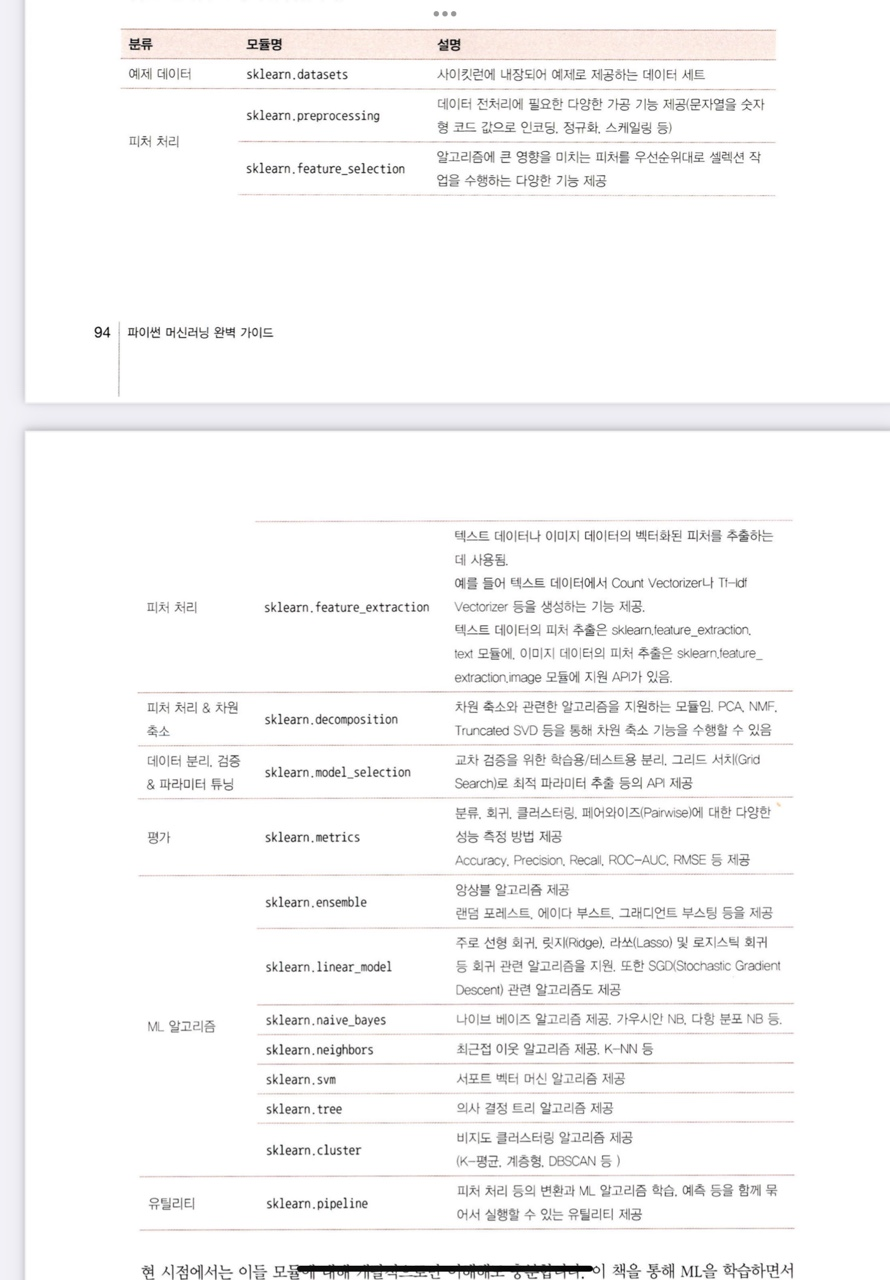

일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 **피처 처리** , **ML알고리즘 학습/ 예측 수행**, 그리고 **모델 평가의 단계를 반복적으로 수행**하는 것이다.

### **내장된 예제 데이터 세트**
사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내렵다을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장돼 있다. 이렇게 두가지로 나눠진다.
- 분류나 회귀를 연습하기 위한 예제용도의 데이터 세트
- 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트

**<분류나 회귀 연습용 예제 데이터>**
- datasets.load_boston() : 회귀 용도/ 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
- datasets.load_breast_cancer() : 분류 용도/ 위스콘신 유방암 피처들과 악성,음성 레이블 데이터 세트
- datasets.load_diabetes() :회귀용도/ 당뇨 데이터 세트
- datasets.load_digits(): 분류용도/ 0에서 9까지의 숫자의 이미지 픽셀 데이터 세트
- datasets.load_iris() : 분류용도/ 붓꽃에 대한 피처를 가진 데이터 세트
--------------
- fetch_covtype(): 회귀분석용 토지 조사 자료
- fetch_20newsgroups(): 뉴스 그룹 테스트 자료
- fetch_olivetti_faces(): 얼굴 이미지 자료
- fetch_rcv1() : 로이터 뉴스 말뭉치
- fetch_mldata(): ML웹사이트에서 다운로드

> fetch 계열의 명령은 데이터 크기가 커서 패키지에 저장되어 있지 않고, 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data 라는 서브 디렉터리에 저장한후 추후 불러들이는 데이터임.

**<분류나 클러스터링을 위한 표본 데이터 생성기>**
- datasets.make_classifications() : 분류를 위한 데이터 세트를 만든다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성한다.

- datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성한다. 군집 지정 개수에 따라 여러가지 클러스터링을 위한 데이터 세트를 쉽게 만들어준다.

* 이 밖에도 많지만 이 두개로 여러가지 사례에 사용할 수 있다!

**<연습용 예제 데이터 구성 살펴보기>**
* 딕셔너리 형태
* 키 : data, target, target_name, feature_names, DESCR
 1. data : 피처의 데이터 세트
 2. target : 분류시 레이블 값, 회귀일때는 숫자 결괏값 데이터 세트
 3. target_names : 개별 레이블의 이름
 4. feature_names : 피처의 이름
 5. DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타냄

 1,2는 넘파이 배열 타입, 3,4는 넘파이 배열 또는 파이썬 리스트 타입, DESCR은 스트링 타입이다. 


In [11]:
#붓꽃 데이터 세트 생성
from sklearn.datasets import load_iris
iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


위 출력에서 load_iris () API의 반환 결과는 sklearn.utils.Bunch 클래스이다. Bunch 클래스는 파이선 딕셔너리 자료형과 유사하다. 

load_iris () 데이터 세트의 key값을 확인해보자.

In [12]:
keys=iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


데이터 키 = 피처데이터 값

피처 데이터 값을 추출하기 위해서 : 데이터세트.data  or  데이터세트['data']

다른 값들 추출도 동일하다.

In [16]:
print('\n feature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:' , type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:' , type(iris_data.data))
print('target의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 

### **4) Modet Selection 모듈 소개**

학습데이터와 테스트 데이터 세트를 분리 / 교차 검증 분할 및 평가, Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공한다.

 #### **학습/테스트 데이터 세트 분리 - train_test_split()**

In [17]:
#학습 데이터 세트로만 학습하기

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
iris=load_iris()
dt_clf = DecisionTreeClassifier()
train_data=iris.data
train_label  = iris.target
dt_clf.fit(train_data, train_label)

#학습 데이터 세트로 예측 수행
pred=dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


정확도가 100%가 나왔다. 이유는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문이다. 즉 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 한다.

1. sklearn.model_selection 모듈에서 train_test_split 로드하기
2. train_test_split(피처 데이터 세트, 레이블 데이터 세트)
3. 선택적으로 다음 파라미터를 입력받는다.

 test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. 디폴트는 0.25

 train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. test_size parameter를 통상적으로 사용하기 때문에 train_size는 잘 사용되지 않는다.

 shuffle : 데이트를 분리하기 전에 데이터를 미리 섞을지 결정한다. 디폴트는 True이다. 데이터를 분산시켜서 좀 더 효율적인 학습 ㅁ치 테스트 데이터 세트를 만드는데 사용된다.
 
  random_state : random_state는 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값이다. train_test_split()호출시 무작위로 데이터를 분리하므로 이것을 지정하지 않으면 수행할 때마다 다른 학습/ㄷ테스트 용 데이터를 생성한다.

 train_test_split() 반환값은 튜플 형태이다. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 레이블 데이터 세트가 반환된다. 

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data=load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target , test_size=0.3, random_state=121)

dt_clf.fit(X_train, y_train)
pred= dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9556


#### **교차 검증**
알고리즘을 학습시키는 학습데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하다. 하지만 이는 과적합에 취약한 약점을 가질 수 있다. 


> 과적합 : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에 예측 성능이 과도하게 떨어지는 것을 말한다. 


이를 해결하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행한다.

교차검증을 쉽게 예를 들면 본고사를 치르기 전에 모의고사를 여러번 보는 것과 같다. 
교차검증을 통해 데이터 편중을 막을 수 있다. 

대부분의 ML모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스이다. 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다. 


#### **K폴드 교차 검증**
* k개의 데이터 폴드 세트를 만들어서 k번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.
* KFold 와 StratifiedKFold 클래스를 제공한다.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris=load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


* KFold 객체는 split()을 호출해 학습용/ 검증용 데이터로 분할 할 수 있는 인덱스를 반환한다.

In [22]:
n_iter=0

#KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  #KFold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  #학습 및 예측 
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter +=1

  #반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :  {1}, 학습데이터 크기: {2}, 검증데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0}검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  #개별 iteration별 정확도를 합하여 평균 정확도 계산
  print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))



#1 교차 검증 정확도 :  1.0, 학습데이터 크기: 120, 검증데이터 크기 : 30
#1검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 평균 검증 정확도: 1.0

#2 교차 검증 정확도 :  0.9667, 학습데이터 크기: 120, 검증데이터 크기 : 30
#2검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 평균 검증 정확도: 0.98335

#3 교차 검증 정확도 :  0.8667, 학습데이터 크기: 120, 검증데이터 크기 : 30
#3검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 평균 검증 정확도: 0.9444666666666667

#4 교차 검증 정확도 :  0.9333, 학습데이터 크기: 120, 검증데이터 크기 : 30
#4검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 평균 검증 정확도: 0.941675

#5 교차 검증 정확도 :  0.7333, 학습데이터 크기: 120, 검증데이터 크기 : 30
#5검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


5번의 교차 검증 결과 평균 검증 정확도는 0.9가 나왔다. 그리고 교차 검증 시마다 검증 세트의 인덱스가 달라짐을 볼 수 있다. 

**Stratified K 폴드**
이 폴드는 불균형한 분포도를 가진 레이블 데이터 집합을 위한 방식이다. 이 폴드를 이용하여 레이블 데이터 집합이 원본 데이터 집합을 레이블 분포를 학습 및 테ㅡㅅ트 세트에 제대로 분배하지 못하는 경우의 문제를 해결한다. 

* 먼저 원본 데이터의 레이블 분포를 고려한다.
* 위 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.

In [28]:
import pandas as pd

iris=load_iris()
iris_df = pd.DataFrame(data=iris.data , columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()


0    50
1    50
2    50
Name: label, dtype: int64

In [35]:
kfold= KFold(n_splits = 3)
n_iter = 0 
for train_index, test_index in kfold.split(iris_df):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('##교차 검증:{0}'.format(n_iter))
  print('학습 레이블 분포 :\n', label_train.value_counts())
  print('검증 레이블 분포 :\n', label_test.value_counts())
  iris_df['label'].value_counts()

##교차 검증:1
학습 레이블 분포 :
 1    50
2    50
Name: label, dtype: int64
검증 레이블 분포 :
 0    50
Name: label, dtype: int64
##교차 검증:2
학습 레이블 분포 :
 0    50
2    50
Name: label, dtype: int64
검증 레이블 분포 :
 1    50
Name: label, dtype: int64
##교차 검증:3
학습 레이블 분포 :
 0    50
1    50
Name: label, dtype: int64
검증 레이블 분포 :
 2    50
Name: label, dtype: int64


여기서 또 주의해야 할 점은 레이블 데이터 값의 분포도가 동일하게 할당되어야한다. 0,1,2값이 있는데 하나만 몽땅 뽑히는 문제가 발생할 수도 있기 때문이다. 

In [38]:
dt_clf=DecisionTreeClassifier(random_state=156)

skfold =StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

#StratifiedKFold의 split()호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
 

  #반복 시마다 정확도 측정
  n_iter +=1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :  {1}, 학습데이터 크기: {2}, 검증데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0}검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  #교차 검증별 정확도를 합하여 평균 정확도 계산
  print('\n## 교차 검증 정확도:', np.mean(cv_accuracy, 4))
  print('##검증 검증 정확도:', np.mean(cv_accuracy))


NameError: ignored

왜곡된 레이블 데이터 세트에서는 반드시 Stratified K폴드를 이용해 교차 검증을 해야한다.
분류에서의 교차 검증은 K폴드가 아니라 Statified K폴드로 분할 돼야 한다.
회귀에서는 Statified K폴드가 지원되지 않는다. 왜냐하면 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문이다. 

**교차 검증을 보다 간편하게 해주는 - cross_val_score()**

KFold로 데이터를 학습하고 예측하는 코드를 보면 
1. 폴드 세트를 설정한다.
2. for루프에서 반복으로 학습 및 테스트 데이터의 인데긋를 추출한다.
3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환한다.

위 가정을 한꺼번에 수행해주는 API이다.

선언형태 : `cross_val_score(estimator, X, y=None, scoring = None, cv= None, n_jobs=1, verbose=0, fit_params= None, pre_dispatch='2*n_jobs')`

* estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 휘귀 알고리즘 클래스인 regressor을 의미
* X: 피처 데이터 세트
* y: 레이블 데이터 세트
* scoring : 예측 성능 평가 지표를 기술
* cv: 교차 검증 폴드 수
* 반환값: scoring 파라미터로 지정된 성능 지표 측정값을 배열 ㅎ여태로 반환

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf= DecisionTreeClassifier(random_state=156)

data= iris_data
label= iris_data.target

#성능 지표는 정확도(accuracy),교차 검증 세트는 3개
scores= cross_val_score(dt_clf, data, label ,scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

ValueError: ignored

cross_val_score() API는 내부에서 Estimator을 학습(fit) , 예측(predict), 평가 (evaluation)시켜주므로 간단하게 교차 검증을 수행할 수 있다.
* 내부적으로 StratifiedKFold를 이용한다.

cross_validate() - 하나의 평가 지표만 가능한 cross_val_score()와 다르게 여러 개의 평가 지표를 반환할 수 있다.



---
### **GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**
파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다.



In [42]:
grid_parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}
#하이퍼 파라미터는 순차적으로 적용되며 총 6회에 걸쳐 실행하며 최적의 파라미터와 수행 결과를 도출할 수 있다. for루프로 모든 파라미터를 번갈아 입력하면서 학습시키는 방법 대신 사용.
#동시수행하므로 수행시간이 오래걸림

**< GridSearchCV생성자로 들어가는 주요 파라미터 >**

* estimator : classifier, regressor, pipeline이 사용된다.
* param_grid: key+리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.
* scoring: 예측 성능을 측정할 평가 방법을 지정한다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열로 지정하나 별도의 성능 평가 지표 함수도 지정 가능
* cv: 교차 검증을 위해 분할되는 학습/ 테스트 세트의 개수를 지정한다.
* refit: 디폴트가 True이며 True로 생성시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator객체를 해당 하이퍼파라미터로 재학습시킴

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target , test_size=0.2, random_state=121)
dtree=DecisionTreeClassifier()

##파라미터를 딕셔너리 형태로 설정
parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [44]:
import pandas as pd

#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree=GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree. cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


위의 결과에서 총 6개의 결과를 볼 수 있으며 하이퍼 파라미터 max_depth 와 min_smples_split 을 순차적으로 총 6번 변경하면서 학습 및 평가를 수행했음을 나타낸다.

* params : 수행할 때마다 적용된 개별 하이퍼 파라미터값
* rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score순위를 나타낸다. 1이 가장 뛰어난 순위이다.
* mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다.

In [45]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))
# GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각에 기록된다.

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [46]:
#이미 학습된 best_estimator을 이용해 앞에서 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가해보자.

#GridSearchCV 의 refit으로 이미 학습된 estimator반환
estimator=grid_dtree.best_estimator_

#GridSearchCV 의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred=estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도:0.9667


이렇게 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 데이터 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다.


---

## **5)데이터 전처리(Data Preprocessing)**
* ML알고리즘은 데이터에 기반하고 이씩 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라진다. 

**<사이킷런의 ML알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야할 기본 사항>**

1, 결손값, 즉 NaN, Null값은 허용되지 않는다. 이러한 null값은 고정된 다른 값으로 변환해야 한다. 


> null값이 대부분인 경우: 피처는 드롭한다.
null값이 얼마 없는 경우: 피처의 평균값으로 대체

2.사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다. 그래서 모든 문자열 값은 인코딩돼서 숫자형으로 변환해야한다. 

### **데이터 인코딩**

1)레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환하는 것

> 상품 데이터의 상품 구분이 tv,냉장고면은 0과 1로 '숫자형'으로 변환한다. 주의할 점은 01은 숫자가 아니므로 숫자형인 1로 해야함!!
* LabelEncoder 클래스로 구현한다.
* 숫자형으로 변환하면 크고 작음의 특성이 작용하여 알고리즘에 가중치가 부여된다. 때문에 선형회귀와 같은 ML알고리즘에는 적용하지 않ㄴ아야한다. 


2)원-핫 인코딩 : 피처 값의 유형에 따라 새로운 피처를 추가해 **고유 값에 해당하는 칼럼에만 1을 표시**하고 나머지 칼럼에는 0을 표시하는 방식이다. 즉, 행 형태로 돼 있는 피처의 교유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.

* OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다.
* 입력값으로 2차원 데이터가 필요하다.

In [47]:
#레이블 인코딩

from sklearn.preprocessing import LabelEncoder

items=['Tv','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [48]:
#데이터가 많은 경우에는?
print('인코딩 클래스:',encoder.classes_)
#밑 출력값은 0번부터 순서대로 변환된 인코딩 값에 대한 원본이다.

인코딩 클래스: ['Tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [50]:
#다시 디코딩하는 방법
print('디코딩 원본값:',encoder.inverse_transform([3,5,2,0,1,1,3,3]))

디코딩 원본값: ['선풍기' '컴퓨터' '믹서' 'Tv' '냉장고' '냉장고' '선풍기' '선풍기']


In [53]:
#OneHotEncoder이용하여 앞으 데이터를 원-핫 인코딩으로 변환해보자

from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['Tv','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환한다.
encoder=LabelEncoder()
encoder.fit(items)
#2차원 데이터로 변환한다.
labels=labels.reshape(-1,1)

#원-핫 인코딩을 적용한다.
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


판다스에서 get_dummies()를 이용하면 문자열 카테고리 값을 숫자형으로 변환할 필요없이 바로 변환할 수 있다.

In [54]:
import pandas as pd

df=pd.DataFrame({'item':['Tv','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_Tv,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### **피처 스케일링의 정규화**
스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 한다. 표준화와 정규화가 있다.

1) 표준화
데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다. 두 변수의 크기를 같은 단위로 통일해주는 것이다.

`xi_new = (xi - mean(x))/ stdev(x)`

-> 피처 스케일링

**그런데 사이킷런의 전처리에서 제공하는 Normalizer모듈과 일반적인 정규화는 차이가 있다. Normalizer모듈은 선형대수에서의 정규화 개념이 적용됐으며 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다. 즉 개별 벡터를 모든 피처 벡터의 크기로 나눠준다. 

`xi_bew= xi/ (sqrt(xi^2 + yi^2 + zi^2)` 

->벡터 정규화

### **StandardScaler**
표준화를 쉽게 지원하는 클래스이다. 즉 개별 피처를 평균이 0이고 분산이 1인 값으로 변환해준다.

In [55]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터 세트를 로딩하고 데이터프레임으로 변환
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [57]:
#StandardScaler을 이용하여 피처를 한 번에 표준화하기

from sklearn.preprocessing import StandardScaler
#StandardScaler객체 생성
scaler=StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform()호출.
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 dataframe으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### **MinMaxScaler**
데이터 값을 0과 1 사이의 범위 값으로 변환한다. 만약 음수 값이 있으면 -1에서 1값으로 변환한다.
데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다.

In [62]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler=MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform()호출.
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64




---

### **학습 데이터와 테스트 데이터의 스케일리 변환시 유의점**
StandardScale나 MinMaxScaler와 같은 Scaler객체를 이용해 데이터의 스케일링 변환시 fit(), transform(), fit_transform() 메소드를 이용한다. 

fit() : 데이터 변환을 위한 기준 정보 설정을 적용

transform() : 정보를 이용해 데이터를 변환

fit_transform() : 위 두개 한번에 적용

-> fit(), transform()이용시 주의 필요

Scaler객체를 이용해 학습 데이터 세트로 두가지를 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야한다. 

즉! 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [63]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는ㄷ ㅔ이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

* 학습데이터인 train_array부터 MinMaxScaler을 이용해 변환해보자. 

학습데이터는 0부터 10까지 값을 가지는데 MinMaxScaler객체의 fit()을 적용하면 최솟값0, 최댓값10이 설정되며 1/10 Scale이 적용된다. 이제 transform()을 호출하면 1/10 scale로 학습 데이터를 변환하게 되며 원본 데이터 1은 0.1로 된다.

In [66]:
#MinMaxScaler객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler=MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨.
train_scaled= scaler.transform(train_array)
print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


이번에는 테스트 데이터 세트를 변환하는데 fit()을 호출해 스케일리 익준 정보를 다시 적용한 뒤 transform()을 수행한 결과를 확인해보자.

In [67]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled=scaler.transform(test_array)

#test_array의 scale변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


결과를 확인하면 학습데이터와 테스트 데이터의 스케일링이 맞지 않다.
테스트 데이터의 경우) 최솟값0 최댓값 5이므로 1/5로 스케일링 된다.  그래서 1은 0.2가 되는데

학습 데이터의 경우) 1은 0.1이 된다. 

-> 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래한다. 

머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며 , 테스트 데이터의 1값은 학습 데이터와 동일하게 0.1로 변환돼야 한다. 

따라서 테스트 데이터에 다시 fit()을 적용해서는 안 되며, 학습 데이터로 이미 fit()이 적용된 scaler객체를 이용해 transform()으로 변환해야 한다.

* 또 이를 바탕으로 테스트데이터에서는 fit_transform()을 사용해서 안된다.

--------------------
다음 코드는

테스트 데이터에 fit()을 호출하지 않고 학습 데이터로 fit()을 수행한 MinMaxScaler객체의 transform()을 이용해 데이터를 변환한다.

In [69]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#test_array에 scale변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야함.
test_scaled=scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


--> 학습과 테스트 데이터 세트로 분리하기 전에 먼제 전체 데이터 세트에 스케일링을 적용한 뒤 분리하는 것이 더 바람직하다.

그렇지 않다면 테스트 데이터 변환시에는 fit()이나 fit_transform을 적용하지 않고 학습 데이터로 이미 fit()된 scaler객체를 이용해 transform으로 변환한다.